In [ ]:
作業內容


請至以下Kaggle競賽平台期中考連結參加考試，請按join competition加入測驗 

並將任一次提交完成畫面截圖，上傳到github並回到官網完成提交。(提交畫面截圖範例)


👉 https://www.kaggle.com/t/273bcc14b7b4485bbd3ddb5df990b329

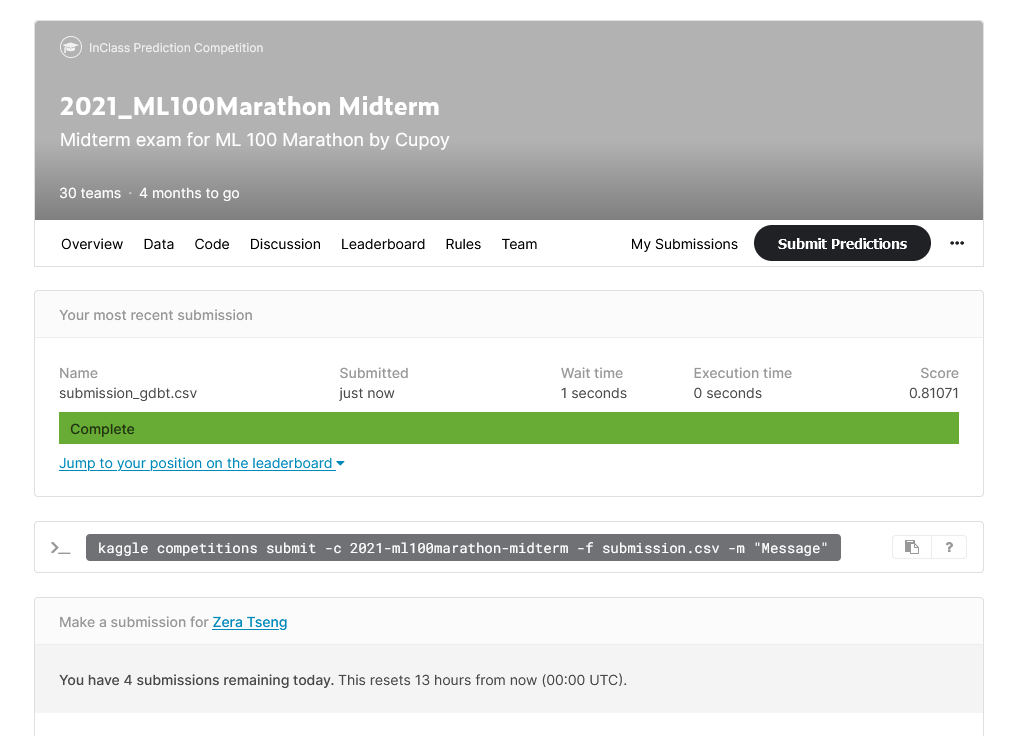

In [45]:
from IPython.display import Image
Image(filename='1.png', width=1000,  height=1000)

In [1]:
# 導入必要的程式庫
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression



# 取得資料集
data_path = 'C:/Users/ADMIN/'
df_train = pd.read_csv(data_path + 'train_data.csv')
df_test = pd.read_csv(data_path + 'test_features.csv')


In [2]:
train_Y = df_train['poi']
ids = df_test['name']
df_train = df_train.drop(['name', 'poi'] , axis=1)
df_test = df_test.drop(['name'] , axis=1)
df = pd.concat([df_train,df_test])
df.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,4.0,NaN,1617011.0,174839.0,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,30.0,NaN,1920000.0,22122.0,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,14.0,NaN,NaN,1573324.0,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,NaN,NaN,602671.0,907502.0,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,25.0,NaN,375304.0,486.0,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [3]:
df.shape

(146, 20)

In [4]:
# 檢查 DataFrame 空缺值的狀態
def na_check(df_data):
    data_na = (df_data.isnull().sum() / len(df_data)) * 100
    data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio' :data_na})
    display(missing_data.head(10))
na_check(df)

,Missing Ratio
loan_advances,97.260274
director_fees,88.356164
restricted_stock_deferred,87.671233
deferral_payments,73.287671
deferred_income,66.438356
long_term_incentive,54.794521
bonus,43.835616
from_messages,41.095890
from_poi_to_this_person,41.095890
from_this_person_to_poi,41.095890


In [5]:
#將所有有缺失值的欄位填入0
df= df.fillna(0)
df

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,0.0,-3504386.0,0.0,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,4.0,0.0,1617011.0,174839.0,2748364.0,0.0,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,0.0,0.0,0.0,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,30.0,0.0,1920000.0,22122.0,6843672.0,0.0,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,0.0,-4167.0,0.0,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,14.0,0.0,0.0,1573324.0,869220.0,0.0,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,0.0,0.0,0.0,michael.kopper@enron.com,0.0,118134.0,0.0,0.0,0.0,0.0,602671.0,907502.0,985032.0,0.0,224305.0,0.0,0.0,2652612.0,985032.0
4,1250000.0,0.0,-262500.0,0.0,christopher.calger@enron.com,0.0,35818.0,144.0,199.0,25.0,0.0,375304.0,486.0,126027.0,0.0,240189.0,2188.0,2598.0,1639297.0,126027.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,1000000.0,0.0,0.0,0.0,philippe.bibi@enron.com,1465734.0,38559.0,40.0,23.0,8.0,0.0,369721.0,425688.0,378082.0,0.0,213625.0,1336.0,1607.0,2047593.0,1843816.0
29,1500000.0,0.0,0.0,0.0,john.sherriff@enron.com,1835558.0,0.0,92.0,28.0,23.0,0.0,554422.0,1852186.0,1293424.0,0.0,428780.0,2103.0,3187.0,4335388.0,3128982.0
30,0.0,504610.0,0.0,0.0,dana.gibbs@enron.com,2218275.0,0.0,12.0,0.0,0.0,0.0,461912.0,0.0,0.0,0.0,0.0,23.0,169.0,966522.0,2218275.0
31,200000.0,204075.0,0.0,0.0,tod.lindholm@enron.com,2549361.0,57727.0,0.0,0.0,0.0,0.0,175000.0,2630.0,514847.0,0.0,236457.0,0.0,0.0,875889.0,3064208.0


In [6]:
#填補缺失值之後再次查看缺失值的比例
na_check(df)

,Missing Ratio


In [7]:
fillna_list=['bonus','salary','loan_advances','restricted_stock_deferred','director_fees','deferral_payments',
            'deferred_income', 'long_term_incentive','total_payments','total_stock_value','restricted_stock','expenses',
            'to_messages','shared_receipt_with_poi','from_this_person_to_poi','from_messages','other','exercised_stock_options',
            'from_poi_to_this_person']
df_fillna_list = np.log1p(df[fillna_list])
df_fillna_list

<ipython-input-7-7242a7cad6b6>:5: RuntimeWarning: invalid value encountered in log1p
  df_fillna_list = np.log1p(df[fillna_list])


,bonus,salary,loan_advances,restricted_stock_deferred,director_fees,deferral_payments,deferred_income,long_term_incentive,total_payments,total_stock_value,restricted_stock,expenses,to_messages,shared_receipt_with_poi,from_this_person_to_poi,from_messages,other,exercised_stock_options,from_poi_to_this_person
0,14.375127,12.949526,0.0,0.0,0.0,0.000000,NaN,14.296091,13.132415,16.930915,14.826517,10.756860,6.809039,6.762730,1.609438,2.944439,12.071627,16.800898,3.761200
1,15.538277,13.921004,0.0,0.0,0.0,0.000000,0.0,14.467836,15.976845,17.077203,15.738835,10.286605,8.196437,7.622175,3.433987,4.691348,10.004373,16.773022,4.488636
2,12.206078,12.263610,0.0,0.0,0.0,0.000000,NaN,0.000000,14.510599,14.729245,13.675353,10.038237,5.420535,4.521789,2.708050,3.688879,14.268702,14.300647,2.639057
3,13.592368,12.320766,0.0,0.0,0.0,0.000000,0.0,13.309128,14.791056,13.800430,13.800430,11.679583,0.000000,0.000000,0.000000,0.000000,13.718452,0.000000,0.000000
4,14.038655,12.389186,0.0,0.0,0.0,0.000000,NaN,12.835494,14.309779,11.744259,11.744259,10.486234,7.862882,7.691200,3.258097,4.976734,6.188264,0.000000,5.298317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,13.815512,12.271982,0.0,0.0,0.0,0.000000,0.0,12.820507,14.532176,14.427348,12.842869,10.559971,7.382746,7.198184,2.197225,3.713572,12.961464,14.197867,3.178054
29,14.220976,12.968702,0.0,0.0,0.0,0.000000,0.0,13.225683,15.282322,14.956219,14.072804,0.000000,8.067149,7.651596,3.178054,4.532599,14.431878,14.422860,3.367296
30,0.000000,0.000000,0.0,0.0,0.0,13.131543,0.0,13.043132,13.781460,14.612241,0.000000,0.000000,5.135798,3.178054,0.000000,2.564949,0.000000,14.612241,0.000000
31,12.206078,12.373526,0.0,0.0,0.0,12.226248,0.0,12.072547,13.682996,14.935300,13.151627,10.963498,0.000000,0.000000,0.000000,0.000000,7.875119,14.751354,0.000000


In [8]:
#處理e-mail，當其改為label encoding的方式(有資料為1，NA為0)
df['email_address'] =df['email_address'].apply(lambda x:0 if str(x)=='nan' else 1)

In [9]:
#填補缺值之後，將缺失值過高的幾個欄位捨去 
df = df.drop(["loan_advances","restricted_stock_deferred"], axis = 1)
df

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,other,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,0.0,-3504386.0,0.0,1,19794175.0,46950.0,18.0,42.0,4.0,1617011.0,174839.0,2748364.0,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,0.0,0.0,0.0,1,19250000.0,29336.0,108.0,88.0,30.0,1920000.0,22122.0,6843672.0,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,0.0,-4167.0,0.0,1,1624396.0,22884.0,39.0,13.0,14.0,0.0,1573324.0,869220.0,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,0.0,0.0,0.0,1,0.0,118134.0,0.0,0.0,0.0,602671.0,907502.0,985032.0,224305.0,0.0,0.0,2652612.0,985032.0
4,1250000.0,0.0,-262500.0,0.0,1,0.0,35818.0,144.0,199.0,25.0,375304.0,486.0,126027.0,240189.0,2188.0,2598.0,1639297.0,126027.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,1000000.0,0.0,0.0,0.0,1,1465734.0,38559.0,40.0,23.0,8.0,369721.0,425688.0,378082.0,213625.0,1336.0,1607.0,2047593.0,1843816.0
29,1500000.0,0.0,0.0,0.0,1,1835558.0,0.0,92.0,28.0,23.0,554422.0,1852186.0,1293424.0,428780.0,2103.0,3187.0,4335388.0,3128982.0
30,0.0,504610.0,0.0,0.0,1,2218275.0,0.0,12.0,0.0,0.0,461912.0,0.0,0.0,0.0,23.0,169.0,966522.0,2218275.0
31,200000.0,204075.0,0.0,0.0,1,2549361.0,57727.0,0.0,0.0,0.0,175000.0,2630.0,514847.0,236457.0,0.0,0.0,875889.0,3064208.0


In [10]:
# 查看這些財務特徵資料是否有怪異的值或是離群值。
finanace_features  =   ['salary', 'deferral_payments', 'total_payments','bonus','deferred_income', 'total_stock_value',
                        'expenses','exercised_stock_options', 'other', 'long_term_incentive','restricted_stock', 'director_fees'] 

unfinace_features =  ['to_messages',  'from_poi_to_this_person', 'from_messages',
                   'from_this_person_to_poi','shared_receipt_with_poi']

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline

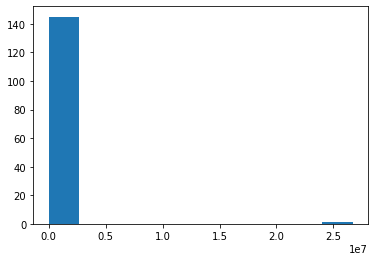

0.0         51
278601.0     2
206121.0     1
261809.0     1
274975.0     1
            ..
365788.0     1
267102.0     1
655037.0     1
224305.0     1
261879.0     1
Name: salary, Length: 95, dtype: int64

In [12]:
#查看每個特徵的資料是否有奇怪的地方
#salary
plt.hist(df["salary"])
plt.show()
df["salary"].value_counts()

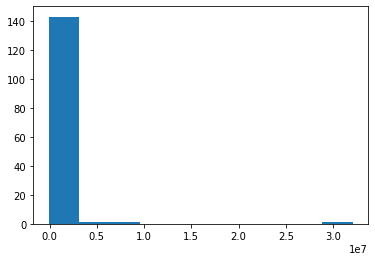

 0.0           107
 50591.0         1
 32083396.0      1
 16586.0         1
 3131860.0       1
 214678.0        1
 51365.0         1
 504610.0        1
 831299.0        1
 27610.0         1
 187469.0        1
 6426990.0       1
 875307.0        1
-102500.0        1
 1130036.0       1
 73122.0         1
 2964506.0       1
 53625.0         1
 774401.0        1
 649584.0        1
 2157527.0       1
 202911.0        1
 85430.0         1
 181755.0        1
 564348.0        1
 227449.0        1
 1848227.0       1
 2144013.0       1
 10259.0         1
 1295738.0       1
 842924.0        1
 7961.0          1
 181993.0        1
 204075.0        1
 77716.0         1
 260455.0        1
 684694.0        1
 178980.0        1
 93585.0         1
 2869717.0       1
Name: deferral_payments, dtype: int64

In [13]:
#deferral_payments
plt.hist(df["deferral_payments"])
plt.show()
df["deferral_payments"].value_counts()

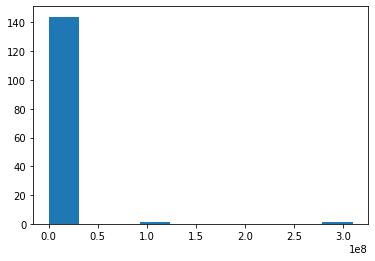

0.0            21
103559793.0     1
2424083.0       1
550981.0        1
111529.0        1
               ..
49288.0         1
505050.0        1
1318763.0       1
4099771.0       1
7961.0          1
Name: total_payments, Length: 126, dtype: int64

In [14]:
#total_payments
plt.hist(df["total_payments"])
plt.show()
df["total_payments"].value_counts()

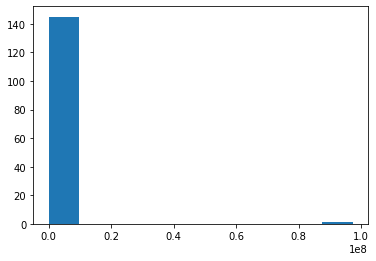

0.0           64
1000000.0      6
600000.0       6
700000.0       5
400000.0       4
750000.0       4
800000.0       4
200000.0       3
325000.0       3
850000.0       3
300000.0       3
900000.0       2
1500000.0      2
2000000.0      2
3000000.0      2
500000.0       2
350000.0       2
250000.0       2
1200000.0      2
100000.0       2
1100000.0      2
1750000.0      1
1700000.0      1
7000000.0      1
788750.0       1
1300000.0      1
450000.0       1
1150000.0      1
8000000.0      1
70000.0        1
4175000.0      1
650000.0       1
1250000.0      1
2500000.0      1
97343619.0     1
3100000.0      1
509870.0       1
5600000.0      1
5249999.0      1
425000.0       1
1350000.0      1
2600000.0      1
Name: bonus, dtype: int64

In [15]:
#bonus
plt.hist(df["bonus"])
plt.show()
df["bonus"].value_counts()

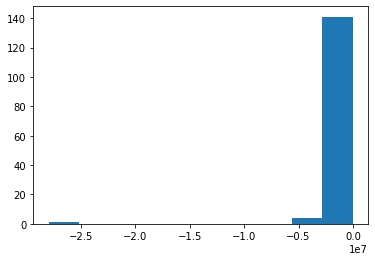

 0.0           97
-25000.0        4
-300000.0       2
-1386055.0      2
-4167.0         1
-485813.0       1
-280000.0       1
-934484.0       1
-33333.0        1
-694862.0       1
-775241.0       1
-3504386.0      1
-113784.0       1
-833.0          1
-38346.0        1
-103750.0       1
-41250.0        1
-27992891.0     1
-575000.0       1
-101250.0       1
-10800.0        1
-5104.0         1
-1042.0         1
-144062.0       1
-3117011.0      1
-1284000.0      1
-17500.0        1
-121284.0       1
-200000.0       1
-98784.0        1
-235000.0       1
-3367011.0      1
-159792.0       1
-3081055.0      1
-262500.0       1
-719000.0       1
-75000.0        1
-2334434.0      1
-400729.0       1
-51042.0        1
-201641.0       1
-100000.0       1
-36666.0        1
-583325.0       1
-125000.0       1
Name: deferred_income, dtype: int64

In [16]:
#deferred_income
plt.hist(df["deferred_income"])
plt.show()
df["deferred_income"].value_counts()

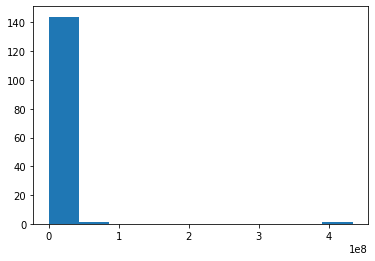

0.0          20
2493616.0     2
126027.0      2
850477.0      1
2282768.0     1
             ..
1794412.0     1
6077885.0     1
1030329.0     1
2332399.0     1
987001.0      1
Name: total_stock_value, Length: 125, dtype: int64

In [17]:
#total_stock_value
plt.hist(df["total_stock_value"])
plt.show()
df["total_stock_value"].value_counts()

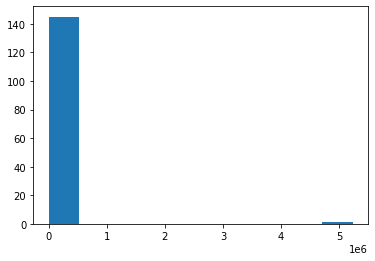

0.0         51
16514.0      2
27861.0      1
50936.0      1
48405.0      1
            ..
129142.0     1
35818.0      1
11892.0      1
9410.0       1
29336.0      1
Name: expenses, Length: 95, dtype: int64

In [18]:
#expenses
plt.hist(df["expenses"])
plt.show()
df["expenses"].value_counts()

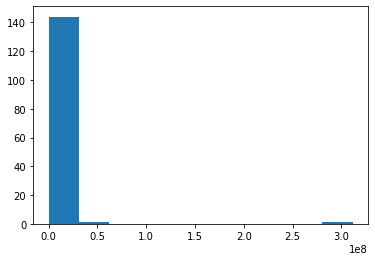

0.0          44
1624396.0     2
4346544.0     1
17378.0       1
2282768.0     1
             ..
2027865.0     1
1451869.0     1
384728.0      1
591250.0      1
2165172.0     1
Name: exercised_stock_options, Length: 102, dtype: int64

In [19]:
#exercised_stock_options
plt.hist(df["exercised_stock_options"])
plt.show()
df["exercised_stock_options"].value_counts()

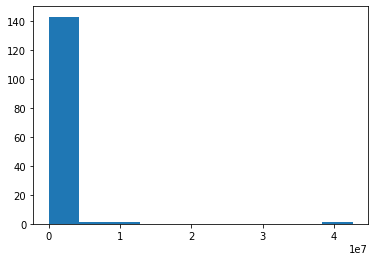

0.0          53
540.0         2
680833.0      1
25553.0       1
2401.0        1
             ..
401481.0      1
465357.0      1
1553729.0     1
7482.0        1
486.0         1
Name: other, Length: 93, dtype: int64

In [20]:
#other
plt.hist(df["other"])
plt.show()
df["other"].value_counts()

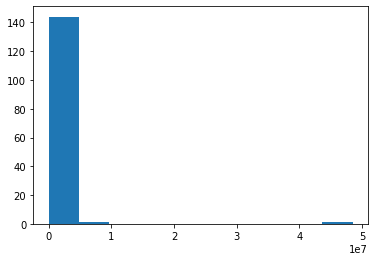

0.0           80
554422.0       4
304805.0       3
1617011.0      3
200000.0       2
694862.0       2
275000.0       2
556416.0       2
175000.0       2
375304.0       2
300000.0       2
350000.0       1
831809.0       1
540751.0       1
369721.0       1
323466.0       1
461912.0       1
476451.0       1
100000.0       1
422158.0       1
769862.0       1
125000.0       1
135836.0       1
69223.0        1
415657.0       1
1725545.0      1
983346.0       1
602671.0       1
256191.0       1
180250.0       1
2035380.0      1
156250.0       1
484000.0       1
974293.0       1
1586055.0      1
312500.0       1
1387399.0      1
1736055.0      1
150000.0       1
75000.0        1
93750.0        1
3600000.0      1
2234774.0      1
808346.0       1
374347.0       1
48521928.0     1
1105218.0      1
1294981.0      1
71023.0        1
365625.0       1
5145434.0      1
335349.0       1
1920000.0      1
Name: long_term_incentive, dtype: int64

In [21]:
#long_term_incentive
plt.hist(df["long_term_incentive"])
plt.show()
df["long_term_incentive"].value_counts()

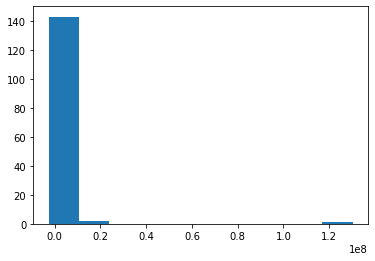

0.0           36
126027.0       5
441096.0       3
315068.0       3
189041.0       3
              ..
13847074.0     1
6843672.0      1
2796177.0      1
417619.0       1
466101.0       1
Name: restricted_stock, Length: 98, dtype: int64

In [22]:
#restricted_stock
plt.hist(df["restricted_stock"])
plt.show()
df["restricted_stock"].value_counts()

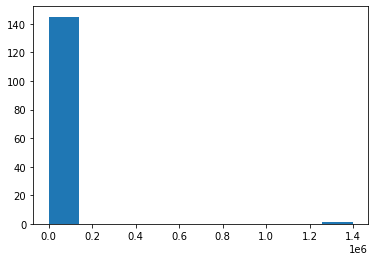

0.0          129
119292.0       1
101250.0       1
108579.0       1
137864.0       1
103750.0       1
38346.0        1
102492.0       1
125034.0       1
98784.0        1
108750.0       1
1398517.0      1
17500.0        1
109298.0       1
36666.0        1
3285.0         1
113784.0       1
112492.0       1
Name: director_fees, dtype: int64

In [23]:
#director_fees
plt.hist(df["director_fees"])
plt.show()
df["director_fees"].value_counts()

In [24]:
#由於財務資料中，有許多筆為0，但並非為離群值，因此使用標準化(Z分數)會比起最大最小化還來得合適。
#另外email資料由於都是呈現次數為主，因此不用再多做其他處理，以原資料即可使用(就像是做過label encoding一樣)。
def normalize_value(x):
    x = (( (x - np.mean(x)) / (np.std(x))))
    return x
df[finanace_features] = normalize_value(df[finanace_features])

In [25]:
df

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,other,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,0.051638,-0.160618,-1.317090,-0.163701,1,0.600880,-0.055187,18.0,42.0,4.0,0.236181,-0.111887,0.091977,0.024966,864.0,905.0,-0.143267,0.462220
1,0.528935,-0.160618,0.161497,-0.163701,1,0.579935,-0.096032,108.0,88.0,30.0,0.311323,-0.153502,0.468988,0.339454,2042.0,3627.0,0.161392,0.560528
2,-0.140520,-0.160618,0.159739,-0.163701,1,-0.098470,-0.110994,39.0,13.0,14.0,-0.164844,0.269202,-0.081016,-0.070112,91.0,225.0,-0.087428,-0.092807
3,-0.066136,-0.160618,0.161497,-0.163701,1,-0.160992,0.109885,0.0,0.0,0.0,-0.015379,0.087764,-0.070354,-0.064438,0.0,0.0,-0.063259,-0.134570
4,-0.010349,-0.160618,0.050742,-0.163701,1,-0.160992,-0.081001,144.0,199.0,25.0,-0.071767,-0.159398,-0.149433,-0.057205,2188.0,2598.0,-0.101010,-0.158350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,-0.041342,-0.160618,0.161497,-0.163701,1,-0.104577,-0.074645,40.0,23.0,8.0,-0.073152,-0.043530,-0.126229,-0.069301,1336.0,1607.0,-0.085799,-0.110795
29,0.020645,-0.160618,0.161497,-0.163701,1,-0.090342,-0.164061,92.0,28.0,23.0,-0.027345,0.345192,-0.041964,0.028674,2103.0,3187.0,-0.000568,-0.075217
30,-0.165315,0.024091,0.161497,-0.163701,1,-0.075612,-0.164061,12.0,0.0,0.0,-0.050288,-0.159531,-0.161035,-0.166580,23.0,169.0,-0.126074,-0.100429
31,-0.140520,-0.085918,0.161497,-0.163701,1,-0.062868,-0.030196,0.0,0.0,0.0,-0.121444,-0.158814,-0.113639,-0.058904,0.0,0.0,-0.129451,-0.077011


In [26]:
from sklearn.model_selection import train_test_split

train_num = train_Y.shape[0]
train_X = df[:train_num]
test_X = df[train_num:]

X_train, X_test, y_train, y_test = train_test_split(train_X,train_Y, test_size=0.3, random_state=10)

In [27]:
#決策樹
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
dtclf = DecisionTreeClassifier(random_state=5)

dtclf.fit(X_train, y_train)
y_pred = dtclf.predict(X_test)

print("acc_決策樹(未調整參數) :" , metrics.accuracy_score(y_pred, y_test))

acc_決策樹(未調整參數) : 0.8529411764705882


In [30]:
#尋找最佳參數組合
from sklearn.model_selection import RandomizedSearchCV

hyperparameter_space = {'max_depth':[2,3,4,6,8,10,12,15,20], 
                        'min_samples_leaf':[1,2,4,6,8,10,20,30],
                        'min_samples_split':[1,2,3,4,5,6,8,10]}

rs_dtclf = RandomizedSearchCV(dtclf, param_distributions=hyperparameter_space,
                        n_iter=10, scoring="accuracy", random_state=20,
                        n_jobs=-1, cv=10, return_train_score=True)

rs_dtclf.fit(X_train, y_train)
print("最佳參數組合 :" ,rs_dtclf.best_params_)

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


最佳參數組合 : {'min_samples_split': 10, 'min_samples_leaf': 30, 'max_depth': 4}


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.875  0.8875 0.875  0.8875 0.8875 0.8875 0.8875    nan 0.875  0.8625]
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the train scores are non-finite: [0.91562989 0.88609155 0.91562989 0.88609155 0.88609155 0.90295383
 0.91281299        nan 0.93110329 0.95219092]
  warnings.warn(


In [31]:
dtclf_bestparam = DecisionTreeClassifier(
    min_samples_split = rs_dtclf.best_params_["min_samples_split"],
    min_samples_leaf = rs_dtclf.best_params_["min_samples_leaf"],
    max_depth = rs_dtclf.best_params_["max_depth"],
    random_state= 12)

dtclf_bestparam.fit(X_train,y_train)
y_pred = dtclf_bestparam.predict(X_test)

print("acc_決策樹(調整參數) :" , metrics.accuracy_score(y_pred, y_test))

acc_決策樹(調整參數) : 0.8823529411764706


In [32]:
#另一種比較簡單的寫法
rs_dtclf.best_estimator_.fit(X_train, y_train)
y_pred = rs_dtclf.best_estimator_.predict(X_test)
print("acc_決策樹(調整參數) :" , metrics.accuracy_score(y_pred, y_test))

acc_決策樹(調整參數) : 0.8823529411764706


In [33]:
#匯出預測檔案
y_pred_dtclf =  rs_dtclf.best_estimator_.predict_proba(test_X)[:,1]
sub_dtclf = pd.DataFrame({'name':ids, 'poi':y_pred_dtclf})
sub_dtclf.to_csv('submission_決策樹.csv', index=False)

In [ ]:
可以看到調整後的參數都有明顯的提升。

In [34]:
#隨機森林
from sklearn.ensemble import RandomForestClassifier
RFclf = RandomForestClassifier(
    random_state= 40)
RFclf.fit(X_train, y_train)
y_pred = RFclf.predict(X_test)

print("Acc_隨機森林(未改參數) :" , metrics.accuracy_score(y_pred,y_test))

Acc_隨機森林(未改參數) : 0.9117647058823529


In [35]:
hyperparameter_space = {'n_estimators':[2,3,4,5,6,7,8,9,10,20,30,40,50,100], 
                        'max_depth':[1,2,3,4,5,6,7,8,9],
                        "min_samples_split" : [1,2,3,4,5,6,7,8,9,10],
                        "min_samples_leaf" : [1,2,3,4,5]
                       }

rs_RFclf = RandomizedSearchCV(RFclf, param_distributions=hyperparameter_space,
                        n_iter=10, scoring="accuracy", random_state=20,
                        n_jobs=-1, cv=10, return_train_score=True)

rs_RFclf.fit(X_train, y_train)
print("最佳參數組合 :" ,rs_RFclf.best_params_)

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


最佳參數組合 : {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 7}


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [   nan 0.9125 0.8875 0.9125 0.8875 0.9    0.8875 0.9125 0.9    0.875 ]
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the train scores are non-finite: [       nan 0.97046166 0.92969484 0.92265258 0.94094288 0.94096244
 0.90717919 0.92126369 0.89029734 0.90997653]
  warnings.warn(


In [36]:
RFclf_bestparam = RandomForestClassifier(
    min_samples_split = rs_RFclf.best_params_["min_samples_split"],
    min_samples_leaf = rs_RFclf.best_params_["min_samples_leaf"],
    max_depth = rs_RFclf.best_params_["max_depth"],
    n_estimators = rs_RFclf.best_params_["n_estimators"],
    random_state= 100)

RFclf_bestparam.fit(X_train,y_train)
y_pred = RFclf_bestparam.predict(X_test)

print("acc_決策樹(調整參數) :" , metrics.accuracy_score(y_pred, y_test))

acc_決策樹(調整參數) : 0.9117647058823529


In [37]:
rs_RFclf.best_estimator_.fit(X_train, y_train)
y_pred = rs_RFclf.best_estimator_.predict(X_test)
print("acc_隨機森林(調整參數) :" , metrics.accuracy_score(y_pred, y_test))

acc_隨機森林(調整參數) : 0.9117647058823529


In [38]:
#匯出預測檔案
y_pred_RFclf =  rs_RFclf.best_estimator_.predict_proba(test_X)[:,1]
sub_RFclf = pd.DataFrame({'name':ids, 'poi':y_pred_RFclf})
sub_RFclf.to_csv('submission_隨機森林.csv', index=False)

In [39]:
#GDBT
from sklearn.ensemble import GradientBoostingClassifier
gdbt = GradientBoostingClassifier()

gdbt.fit(X_train, y_train)

y_pred = gdbt.predict(X_test)

print("acc_gdbt(未條參數) :", metrics.roc_auc_score(y_test,y_pred))

acc_gdbt(未條參數) : 0.5


In [40]:
hyperparameter_space = {'n_estimators':[2,3,4,5,6,7,8,9,10,20,30,40,50,100], 
                        'max_depth':[1,2,3,4,5,6,7,8,9],
                        "min_samples_split" : [1,2,3,4,5,6,7,8,9,10],
                        "min_samples_leaf" : [1,2,3,4,5],
                        "tol" : [5,10,15,20,30,40,50,60,70,80,90,100,110,120],
                        "subsample" : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
                        "learning_rate" : [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.15,0.2,0.3,0.4,0.5]
                       }

rs_gdbt = RandomizedSearchCV(gdbt, param_distributions=hyperparameter_space,
                        n_iter=10, scoring="accuracy", random_state=20,
                        n_jobs=-1, cv=10, return_train_score=True)

rs_gdbt.fit(X_train, y_train)
print("最佳參數組合 :" ,rs_gdbt.best_params_)

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


最佳參數組合 : {'tol': 5, 'subsample': 0.8, 'n_estimators': 4, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_depth': 7, 'learning_rate': 0.04}


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [   nan 0.8875 0.8875 0.8875 0.8875 0.8875 0.8875 0.875  0.8875 0.8875]
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the train scores are non-finite: [       nan 0.88609155 0.88609155 0.88609155 0.88609155 0.88609155
 0.88609155 1.         0.88609155 0.98313772]
  warnings.warn(


In [41]:
gdbt_bestparam = GradientBoostingClassifier(
    tol = rs_gdbt.best_params_["tol"],
    min_samples_leaf = rs_gdbt.best_params_["min_samples_leaf"],
    max_depth = rs_gdbt.best_params_["max_depth"],
    n_estimators = rs_gdbt.best_params_["n_estimators"],
    subsample = rs_gdbt.best_params_["subsample"],
    learning_rate = rs_gdbt.best_params_["learning_rate"],
    min_samples_split = rs_gdbt.best_params_["min_samples_split"],
    random_state= 200)

gdbt_bestparam.fit(X_train,y_train)
y_pred = gdbt_bestparam.predict(X_test)

print("acc_決策樹(調整參數) :" , metrics.accuracy_score(y_pred, y_test))

acc_決策樹(調整參數) : 0.8823529411764706


In [42]:
rs_gdbt.best_estimator_.fit(X_train, y_train)
y_pred_gdbt = rs_gdbt.best_estimator_.predict(X_test)
print("acc_gdbt(調整參數) :" , metrics.accuracy_score(y_pred, y_test))

acc_gdbt(調整參數) : 0.8823529411764706


In [43]:
#匯出預測檔案
y_pred_gdbt =  rs_gdbt.best_estimator_.predict_proba(test_X)[:,1]
sub_gdbt = pd.DataFrame({'name':ids, 'poi':y_pred_gdbt})
sub_gdbt.to_csv('submission_gdbt.csv', index=False)